In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [17]:
who = pd.read_csv('WHO.csv', header = 0, sep = ',')

In [18]:
who

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2
5,Antigua and Barbuda,Americas,89,25.96,12.35,2.12,75,9.9,196.41,99.0,17900,91.1,84.5
6,Argentina,Americas,41087,24.42,14.97,2.20,76,14.2,134.92,97.8,17130,NaN,NaN
7,Armenia,Europe,2969,20.34,14.06,1.74,71,16.4,103.57,99.6,6100,NaN,NaN
8,Australia,Western Pacific,23050,18.95,19.46,1.89,82,4.9,108.34,NaN,38110,96.9,97.5
9,Austria,Europe,8464,14.51,23.52,1.44,81,4.0,154.78,NaN,42050,NaN,NaN


In [24]:
who.Over60.mean()

11.163659793814434

In [40]:
who_over60 = who.sort('Over60', ascending=1).head(10)

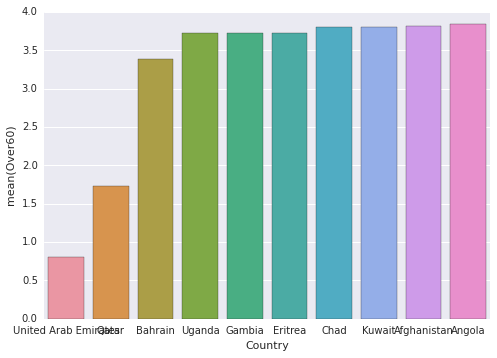

In [41]:
sns.barplot(x=who_over60.Country, y=who_over60.Over60)

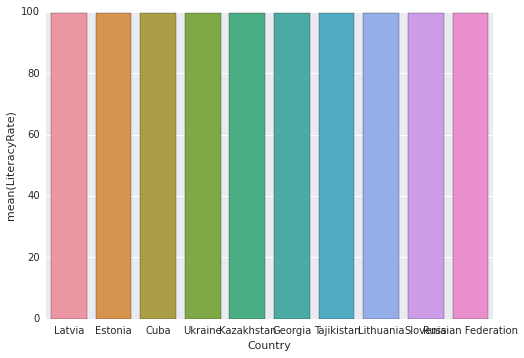

In [39]:
who_lit = who.sort('LiteracyRate', ascending=0).head(10)
sns.barplot(x=who_lit.Country, y=who_lit.LiteracyRate)

In [49]:
who.groupby('Region').ChildMortality.mean()

Region
Africa                   84.036957
Americas                 19.322857
Eastern Mediterranean    40.250000
Europe                   10.050943
South-East Asia          35.045455
Western Pacific          24.711111
Name: ChildMortality, dtype: float64

## Assignment 1

In [2]:
poll = pd.read_csv('AnonymityPoll.csv')

In [3]:
poll.head()

,Internet.Use,Smartphone,Sex,Age,State,Region,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
0,1,0,Male,62,Massachusetts,Northeast,4,0,1,100.000000,0,0,0
1,1,0,Male,45,South Carolina,South,1,1,0,0.000000,1,0,1
2,0,1,Female,70,New Jersey,Northeast,4,0,0,NaN,0,0,NaN
3,1,0,Male,70,Georgia,South,4,3,1,88.888889,1,0,0
4,0,NaN,Female,80,Georgia,South,4,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#How many people participated in the poll?
len(poll)

1002

In [5]:
#How many interviewees responded that they use a smartphone?
len(poll[poll.Smartphone==1])

487

In [6]:
#How many interviewees responded that they don't use a smartphone?
len(poll[poll.Smartphone==0])

472

In [7]:
#How many interviewees did not respond to the question, resulting in a missing value, or NA, in the summary() output?
len(poll[poll.Smartphone.isnull()])

43

In [8]:
#Which of the following are states in the Midwest census region? (Select all that apply.)
pd.crosstab(poll["State"], poll["Region"])

Region,Midwest,Northeast,South,West
State,,,,
Alabama,0,0,11,0
Arizona,0,0,0,24
Arkansas,0,0,10,0
California,0,0,0,103
Colorado,0,0,0,19
Connecticut,0,8,0,0
Delaware,0,0,6,0
District of Columbia,0,0,2,0
Florida,0,0,42,0


In [9]:
#How many interviewees reported not having used the Internet and not having used a smartphone?
pd.crosstab(poll["Internet.Use"], poll["Smartphone"],dropna=True)

Smartphone,0.0,1.0
Internet.Use,,
0,186,17
1,285,470


In [10]:
#How many interviewees have a missing value for their Internet use?
pd.isnull(poll["Internet.Use"]).sum()

1

In [11]:
#How many interviewees have a missing value for their smartphone use?
pd.isnull(poll["Smartphone"]).sum()

43

In [12]:
#How many interviewees are in the new data frame?
poll_new = poll[(poll["Internet.Use"] == 1) | (poll["Smartphone"] == 1)]
len(poll_new)

792

In [20]:
#Which variables have missing values in the limited data frame? (Select all that apply.)
poll_new.count() < 792

Internet.Use              False
Smartphone                 True
Sex                       False
Age                        True
State                     False
Region                    False
Conservativeness           True
Info.On.Internet          False
Worry.About.Info           True
Privacy.Importance         True
Anonymity.Possible         True
Tried.Masking.Identity     True
Privacy.Laws.Effective     True
dtype: bool

In [24]:
#What is the average number of pieces of personal information on the Internet, according to the Info.On.Internet variable?
poll_new.describe()

,Internet.Use,Smartphone,Age,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
count,792.000000,772.000000,770.000000,747.000000,792.000000,790.000000,787.000000,753.000000,784.000000,727.000000
mean,0.978535,0.630829,48.571429,3.236948,3.795455,0.488608,62.848672,0.369190,0.163265,0.255846
std,0.145019,0.482893,17.520732,0.998028,2.699174,0.500187,31.472764,0.482906,0.369844,0.436636
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,33.000000,3.000000,2.000000,0.000000,41.428571,0.000000,0.000000,0.000000
50%,1.000000,1.000000,51.000000,3.000000,4.000000,0.000000,68.750000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.000000,4.000000,6.000000,1.000000,88.888889,1.000000,0.000000,1.000000
max,1.000000,1.000000,93.000000,5.000000,11.000000,1.000000,100.000000,1.000000,1.000000,1.000000


In [25]:
#How many interviewees reported a value of 0 for Info.On.Internet?
sum(poll_new["Info.On.Internet"] == 0)

105

In [26]:
#How many interviewees reported the maximum value of 11 for Info.On.Internet?
sum(poll_new["Info.On.Internet"] == 11)

8

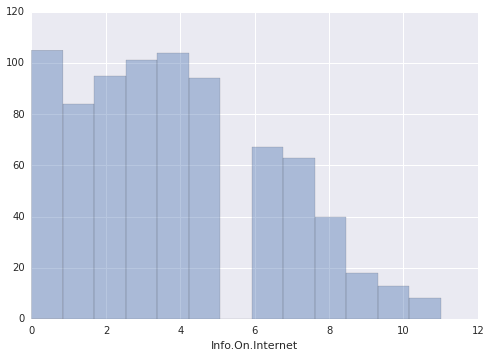

In [30]:
sns.distplot(poll_new["Info.On.Internet"], kde=False ,rug=False,)

In [42]:
#What proportion of interviewees who answered the Worry.About.Info question worry about how much information is available about them on the Internet? 
float(sum(poll_new["Worry.About.Info"]==1))/sum(pd.notnull(poll_new["Worry.About.Info"]))

0.48860759493670886

In [39]:
sum(poll_new["Worry.About.Info"]==1), len(poll_new)

(386, 792)

In [43]:
#What proportion of interviewees who answered the Anonymity.Possible question think it is possible to be completely anonymous on the Internet?
float(sum(poll_new["Anonymity.Possible"]==1))/sum(pd.notnull(poll_new["Anonymity.Possible"]))

0.3691899070385126

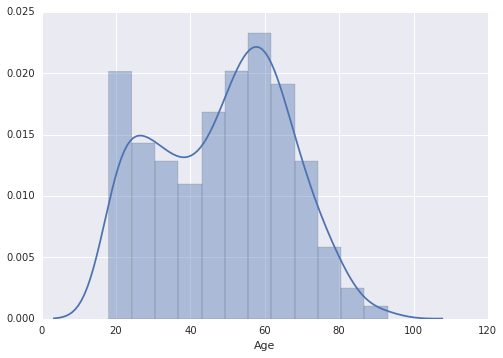

In [48]:
#Build a histogram of the age of interviewees. What is the best represented age group in the population?
sns.distplot(poll_new["Age"].dropna())

In [54]:
#What is the largest number of interviewees that have exactly the same value in their Age variable AND the same value in their Info.On.Internet variable? 
max(pd.crosstab(poll_new["Age"],poll_new["Info.On.Internet"],dropna=True))

11.0

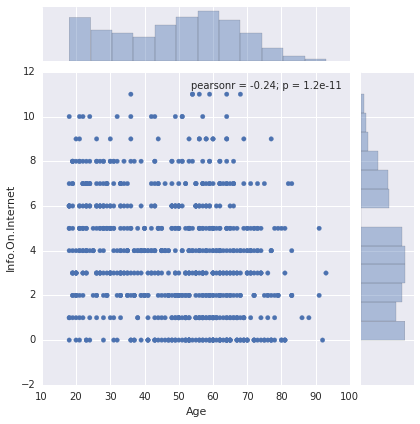

In [55]:
#What relationship to you observe between Age and Info.On.Internet?
sns.jointplot(poll_new["Age"], poll_new["Info.On.Internet"])

In [69]:
#What is the average Info.On.Internet value for smartphone users?
poll_new.groupby("Smartphone").mean()

,Internet.Use,Age,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
Smartphone,,,,,,,,,
0,1.000000,55.709677,3.352060,2.922807,0.480565,61.677464,0.369811,0.117438,0.227799
1,0.965092,44.354565,3.168467,4.367556,0.496920,63.842237,0.360341,0.192547,0.267699


In [ ]:
#What proportion of smartphone users who answered the Tried.Masking.Identity question have tried masking their identity when using the Internet?